# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [ ]:
dataset_train = pd.read_csv('cubtrain3.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [ ]:
len(training_set)

1259

### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
training_set_scaled

array([[0.0040013 ],
       [0.00075026],
       [0.00075026],
       ...,
       [0.55548194],
       [0.54337797],
       [0.52824802]])

### Creating a data structure with 60 timesteps and 1 output

In [ ]:
X_train = []
y_train = []
for i in range(60, 1259):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [ ]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.5))

### Adding a second LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.5))

### Adding a third LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.5))

### Adding a fourth LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.5))

### Adding the output layer

In [ ]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics="accuracy")

### Fitting the RNN to the Training set

In [ ]:
regressor.fit(X_train, y_train, epochs = 500, batch_size =10)


Epoch 1/500
120/120 [==============================] - 29s 127ms/step - loss: 0.0089 - accuracy: 0.0011
Epoch 2/500
120/120 [==============================] - 17s 139ms/step - loss: 0.0070 - accuracy: 0.0014
Epoch 3/500
120/120 [==============================] - 16s 137ms/step - loss: 0.0052 - accuracy: 0.0014
Epoch 4/500
120/120 [==============================] - 17s 139ms/step - loss: 0.0049 - accuracy: 2.6198e-04
Epoch 5/500
120/120 [==============================] - 18s 148ms/step - loss: 0.0047 - accuracy: 0.0011
Epoch 6/500
120/120 [==============================] - 18s 152ms/step - loss: 0.0043 - accuracy: 4.9817e-04
Epoch 7/500
120/120 [==============================] - 19s 157ms/step - loss: 0.0043 - accuracy: 0.0026
Epoch 8/500
120/120 [==============================] - 19s 158ms/step - loss: 0.0042 - accuracy: 0.0016
Epoch 9/500
120/120 [==============================] - 18s 153ms/step - loss: 0.0035 - accuracy: 6.0410e-04
Epoch 10/500
120/120 [==============================

120/120 [==============================] - 15s 129ms/step - loss: 0.0014 - accuracy: 4.3826e-04
Epoch 152/500
120/120 [==============================] - 16s 129ms/step - loss: 0.0014 - accuracy: 3.9327e-04
Epoch 153/500
120/120 [==============================] - 16s 129ms/step - loss: 0.0012 - accuracy: 1.9046e-04
Epoch 154/500
120/120 [==============================] - 16s 130ms/step - loss: 0.0016 - accuracy: 4.1922e-05
Epoch 155/500
120/120 [==============================] - 17s 144ms/step - loss: 0.0014 - accuracy: 0.0020
Epoch 156/500
120/120 [==============================] - 17s 142ms/step - loss: 0.0017 - accuracy: 8.4894e-04
Epoch 157/500
120/120 [==============================] - 17s 140ms/step - loss: 0.0015 - accuracy: 4.2678e-04
Epoch 158/500
120/120 [==============================] - 16s 133ms/step - loss: 0.0015 - accuracy: 1.8194e-04
Epoch 159/500
120/120 [==============================] - 16s 131ms/step - loss: 0.0015 - accuracy: 4.7368e-04
Epoch 160/500
120/120 [=====

120/120 [==============================] - 16s 130ms/step - loss: 0.0011 - accuracy: 5.3632e-04
Epoch 302/500
120/120 [==============================] - 16s 130ms/step - loss: 0.0012 - accuracy: 4.0429e-04
Epoch 303/500
120/120 [==============================] - 16s 129ms/step - loss: 0.0011 - accuracy: 8.3016e-04
Epoch 304/500
120/120 [==============================] - 15s 129ms/step - loss: 0.0011 - accuracy: 7.4216e-04
Epoch 305/500
120/120 [==============================] - 16s 131ms/step - loss: 0.0013 - accuracy: 2.7734e-05
Epoch 306/500
120/120 [==============================] - 16s 131ms/step - loss: 0.0013 - accuracy: 0.0023
Epoch 307/500
120/120 [==============================] - 16s 131ms/step - loss: 0.0012 - accuracy: 2.5269e-04
Epoch 308/500
120/120 [==============================] - 15s 129ms/step - loss: 0.0014 - accuracy: 1.5689e-04
Epoch 309/500
120/120 [==============================] - 16s 130ms/step - loss: 0.0012 - accuracy: 8.1179e-04
Epoch 310/500
120/120 [=====

120/120 [==============================] - 16s 133ms/step - loss: 0.0012 - accuracy: 2.8087e-04
Epoch 452/500
120/120 [==============================] - 16s 134ms/step - loss: 0.0013 - accuracy: 1.7350e-04
Epoch 453/500
120/120 [==============================] - 16s 131ms/step - loss: 0.0011 - accuracy: 0.0044
Epoch 454/500
120/120 [==============================] - 16s 130ms/step - loss: 0.0011 - accuracy: 2.3443e-04
Epoch 455/500
120/120 [==============================] - 17s 138ms/step - loss: 0.0013 - accuracy: 9.4985e-04
Epoch 456/500
120/120 [==============================] - 15s 128ms/step - loss: 0.0014 - accuracy: 5.9009e-04
Epoch 457/500
120/120 [==============================] - 16s 132ms/step - loss: 0.0011 - accuracy: 7.7624e-04
Epoch 458/500
120/120 [==============================] - 15s 129ms/step - loss: 0.0012 - accuracy: 1.3786e-05
Epoch 459/500
120/120 [==============================] - 16s 133ms/step - loss: 0.0013 - accuracy: 1.2464e-04
Epoch 460/500
120/120 [=====

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [ ]:
dataset_test = pd.read_csv('cubtest3.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 81):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

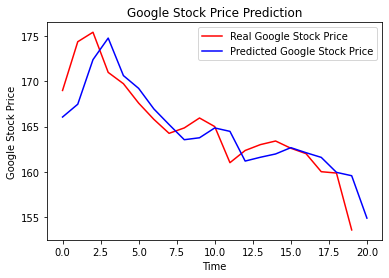

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
regressor.save('my_model_cub4.h5')